<a href="https://colab.research.google.com/github/saiteja7467/community-starter-kit/blob/master/BinaryClassifier_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Removing dodgy images
import os
import cv2
import imghdr
def remove_dodgy_images(folder_path,format):
  for filename in os.listdir(folder_path):
    for image in os.listdir(os.path.join(folder_path,filename)):
      file_path=os.path.join(folder_path,filename,image)#returns the image path in the folder
      try:
        image=cv2.imread(file_path)#checks if it is an image or rendenrs
        tip=imghdr.what(file_path)#returns the format of the image
        if tip not in format:
          print(f"Image not in the right format {file_path}")
          os.remove(file_path)
          continue
        if image is None:
          print(f"Unreadable image: {file_path}")
          os.remove(file_path)
          continue
      except Exception as e:
        print(f"Issue with the image {file_path}: {e}")
        try:
          os.remove(file_path)
        except:
          print(f"Could not delete{file_path}")

In [ ]:
format=["jpg","png","jpeg","bmp"]
data_path="drive/MyDrive/data"
remove_dodgy_images(data_path,format)#removes all the dodgy images from the happy folder

in TensorFlow, it:

Reads image files from the folder /content/drive/MyDrive/data.

Automatically assigns a label to each image based on the subfolder it’s in.

Creates a dataset object (tf.data.Dataset) that you can use to train or test a neural network.

How it works, simply:
Your main folder should be organized with one subfolder per class, like this:

text

data/

  cats/

    cat1.jpg
    cat2.jpg
  dogs/

    dog1.jpg
    dog2.jpg
cats and dogs become class labels (e.g., 0 for cats, 1 for dogs).

The function creates batches of images, each with its corresponding label, ready to be processed by a machine learning model.

What you get:
A dataset you can use directly in training loops for deep learning.

Images are resized automatically (default is 256x256 pixels, but you can set this).

Labels are inferred from the folder names by default.

Images are loaded efficiently and can be shuffled, batched, and preprocessed.

In short: This function makes it easy to turn a well-organized folder of images into a format TensorFlow understands for training models—handling batching, labeling, and resizing for you.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/data")

Found 1988 files belonging to 2 classes.


In [ ]:
data[0]
#Now because this is a dataset generator it is not in the memory we cannot iterate through the dataset directly

TypeError: '_PrefetchDataset' object is not subscriptable

data you get is in the form of regular NumPy arrays (not TensorFlow tensors anymore).

In simple terms:
data is a special TensorFlow dataset object (from your previous step).

.as_numpy_iterator() turns that object into something you can loop over where each batch is a tuple of NumPy arrays: one for images, one for labels.

This is useful if you want to use or inspect the images and labels with tools and workflows outside TensorFlow, because NumPy arrays are the standard way to represent data in Python.

Example usage:

python
for batch in data_iterator:
    images, labels = batch
    # Now images and labels are NumPy arrays
    print(images.shape, labels.shape)
    break  # Just to look at the first batch
Summary:
You use as_numpy_iterator() to loop over your data as plain NumPy arrays, making it easy to inspect or process the content outside TensorFlow.


In [ ]:
data_iterator=data.as_numpy_iterator()#This converts the dataset into numpy can we can iterate through the dataset

Explained simply:
data_iterator is an iterator (something you can get batches from one by one).

.next() gives you the next batch of images and labels as NumPy arrays.

Each time you call .next(), you get a new batch.

So,

The variable batch will be a tuple like (images, labels), where:

images is a NumPy array with a batch of images.

labels is a NumPy array with the corresponding labels.

Why use this?
It lets you step through your dataset one batch at a time and directly use or inspect the data in standard Python/NumPy form, outside of TensorFlow’s internal representation

In [ ]:
batch=data_iterator.next()

In [ ]:
#All the images of the first batch in the form of numpy array
batch[0][:1]

array([[[[176.      , 165.      , 145.      ],
         [176.      , 165.      , 145.      ],
         [176.      , 165.      , 145.      ],
         ...,
         [121.27344 , 165.      , 143.64062 ],
         [122.16406 , 165.      , 148.82031 ],
         [123.      , 165.      , 153.      ]],

        [[176.      , 165.      , 145.      ],
         [176.      , 165.      , 145.      ],
         [176.      , 165.      , 145.      ],
         ...,
         [121.27344 , 165.      , 143.2059  ],
         [122.16406 , 165.      , 147.23047 ],
         [123.      , 165.      , 151.41016 ]],

        [[176.      , 165.      , 145.      ],
         [176.      , 165.      , 145.      ],
         [176.      , 165.      , 145.      ],
         ...,
         [121.27344 , 165.      , 143.09375 ],
         [122.16406 , 165.      , 146.82031 ],
         [123.      , 165.      , 151.      ]],

        ...,

        [[213.6582  , 189.3418  , 122.      ],
         [214.49414 , 190.17773 , 122.83594 ]

In [ ]:
#Labels of the first 32 images in numpy array
batch[1]

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

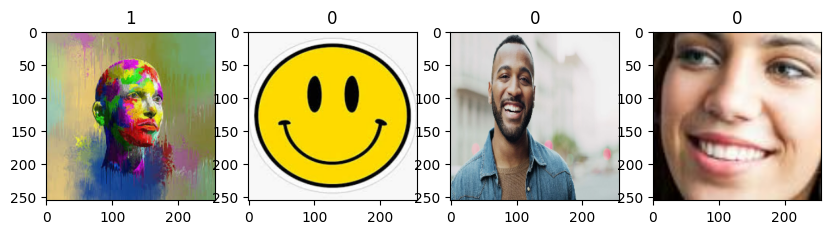

In [ ]:
#To figure out which label corresponds to what manaully using matplotlib
fig,ax=plt.subplots(ncols=4,figsize=(10,4))
for idx,image in enumerate(batch[0][:4]):
  ax[idx].imshow(image.astype(int))
  ax[idx].title.set_text(batch[1][idx])
#1 Sad
#0 Happy

#PreProcess data

In [ ]:
#Scaling data
#x is the images that are converted into 0s and 1
#y is the labels that are already in 0s and 1s
data=data.map(lambda x,y: (x/255,y))
scaled_data=data.as_numpy_iterator()
batch=scaled_data.next()
batch[0].max()

np.float32(1.0)

In [ ]:
data=data.shuffle(buffer_size=63,seed=42)
#Splitting ratio
train_size = int(0.7 * 63)  # 44
val_size = int(0.15 * 63)   # 9
test_size = 63 - train_size - val_size  # 10

In [ ]:
train=data.take(train_size)
valid=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

#Deep Learning Model

What does MaxPooling2D do?
It reduces the size of your image (or feature map) by picking only the most important features in each small region.

example:
Step 1: top-left patch [1, 3; 5, 6] → max is 6  
Step 2: top-right patch [2, 4; 1, 2] → max is 4  
Step 3: bottom-left patch [3, 1; 2, 7] → max is 7  
Step 4: bottom-right patch [4, 0; 1, 3] → max is 4

it converts the 4X4 into 2X2

6  4

7  4

What is a Fully Connected (Dense) Layer?
Each neuron in the layer is connected to every neuron in the previous layer.It processes the features learned by convolutional or other layers and makes the final prediction.

from tensorflow.keras.models import Sequential

Used to create a linear stack of layers (i.e., one after the other).

from tensorflow.keras.layers import Conv2D

2D convolutional layer: extracts spatial features from image data.

from tensorflow.keras.layers import Flatten

Flattens the multi-dimensional feature maps into a 1D vector for input to Dense layers.




what is dropout ?

Some neurons are "dropped" (ignored) temporarily during each training step.This forces the network to not rely too much on any one neuron, promoting robust feature learning.

Why use Dropout?

Prevents overfitting, especially in fully connected (Dense) layers.Forces the network to learn redundant representations, which improves generalization.It's like training a different "mini-network" every time and averaging them in the end.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#Created a sequential model
model=Sequential()
'''### ✅ `16`

> **Number of filters (a.k.a. kernels)**

* Each filter learns to detect different patterns (like edges, colors, textures).
* You’ll get **16 feature maps** after this layer.

> **Filter size (height, width)=`(3, 3)`**

* Each filter is 3×3 in size.
* It slides over the image and captures local patterns.

**Stride=1**
* How many pixels the filter moves at a time.
* A stride of `1` = move one pixel at a time → **detailed scan**.
* (More stride = faster but less precise.)

 ✅ `activation="relu"`

**Activation function applied after convolution**
* `ReLU` = Rectified Linear Unit: replaces all negative values with 0.
* Makes the model nonlinear (learns complex features).

### ✅ `input_shape=(256, 256, 3)`

> **Shape of the input image**

* `256 x 256` = width and height
* `3` = number of channels (RGB)
✅ Example Diagram (Mentally Visualize):
* Input: 256×256×3 image
* After Conv2D → Output: 256×256×16 (same size, but 16 filtered versions)
* Then MaxPooling will reduce size to 128×128×16 (if default pool size is (2,2))
'''
#Input layer
model.add(Conv2D(filters=16,kernel_size=(3,3),strides=1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

#1st layer
model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

#2nd layer
model.add(Conv2D(16,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation="relu"))
#Output layer
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


| Task Type             | Final Layer          | Activation | Loss Function                     |
| --------------------- | -------------------- | ---------- | --------------------------------- |
| Binary Classification | `Dense(1)`           | `sigmoid`  | `binary_crossentropy`             |
| Multiclass (integers) | `Dense(num_classes)` | `softmax`  | `sparse_categorical_crossentropy` |
| Multiclass (one-hot)  | `Dense(num_classes)` | `softmax`  | `categorical_crossentropy`        |

Great — let me explain what this line does in **simple terms**:

---

```python
model.compile(
    optimizer="adam",
    loss=tf.losses.binary_crossentropy,
    metrics=["accuracy"]
)
```

This tells **Keras** **how to train your model** — kind of like setting rules for a game.

---

### 🔧 `optimizer="adam"`

* **Adam** is the algorithm that updates the model's weights to minimize the loss.
* Think of it like the brain that says:

  > “Oops! We were wrong — let’s adjust the weights a bit.”

---

### 🎯 `loss=tf.losses.binary_crossentropy`

* This is the **function** that measures **how wrong** your predictions are during training.
* **Binary cross-entropy** is used for **binary classification** (2 classes).
* The goal of training is to **minimize this loss**.

Example:

* If your model predicted `0.9` for class 1 (correct), loss is small ✅
* If it predicted `0.1`, loss is large ❌

---

### 📏 `metrics=["accuracy"]`

* This tells the model to **track accuracy** (how many predictions were right) during training and evaluation.
* It's **not used for training**, just for **monitoring**.

---

### 🧠 In plain English:

> "Use the Adam optimizer to train the model by minimizing binary cross-entropy loss, and while you're training, show me how accurate the model is."

---


In [ ]:
#Compiling our model
model.compile(optimizer="adam",
              loss=tf.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

Absolutely! Here's a simple breakdown of the model summary you posted — perfect for quick revision:

---

### Model Summary Explained — Step by Step

| Layer Name             | Output Shape         | Parameters | What It Means                                                                                                                 |
| ---------------------- | -------------------- | ---------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **conv2d\_1 (Conv2D)** | (None, 254, 254, 16) | 448        | 16 filters scanning 256×256×3 input with 3×3 kernels, producing 16 feature maps slightly smaller (256→254 because no padding) |
| **max\_pooling2d**     | (None, 127, 127, 16) | 0          | Downsamples feature maps by 2×2 → halves height & width to reduce data size, keeps 16 channels                                |
| **conv2d\_2 (Conv2D)** | (None, 125, 125, 32) | 4,640      | 32 filters scanning previous maps with 3×3 kernels, outputting 32 feature maps smaller than input                             |
| **max\_pooling2d\_1**  | (None, 62, 62, 32)   | 0          | Downsamples by 2×2 again, width/height halved, channels remain 32                                                             |
| **conv2d\_3 (Conv2D)** | (None, 60, 60, 16)   | 4,624      | 16 filters this time, further feature extraction                                                                              |
| **max\_pooling2d\_2**  | (None, 30, 30, 16)   | 0          | Downsamples again to smaller spatial size                                                                                     |
| **flatten**            | (None, 14400)        | 0          | Flattens the 3D feature maps (30×30×16 = 14,400) into 1D vector for Dense layers                                              |
| **dense**              | (None, 256)          | 3,686,656  | Fully connected layer with 256 neurons learning patterns from the flattened data (huge number of params here!)                |
| **dense\_1**           | (None, 1)            | 257        | Final output layer: 1 neuron for binary classification (sigmoid)                                                              |

---

### Key Points to Remember:

* **Output Shape**:

  * `None` means batch size can vary.
  * `(height, width, channels)` for Conv2D and pooling layers.
  * `(None, features)` for dense layers.

* **Parameters**:

  * Number of weights + biases learned during training.
  * Huge jump in parameters at the dense layer because every input neuron connects to every output neuron.

* **Pooling layers have zero params** because they just downsample by picking max values, no learning involved.

---

### Quick formula to calculate Conv2D params:

$$
\text{params} = ( \text{filter height} \times \text{filter width} \times \text{input channels} + 1 ) \times \text{number of filters}
$$

Example for `conv2d_1`:
$(3 \times 3 \times 3 + 1) \times 16 = (27 + 1) \times 16 = 448$

---

### Why so many parameters in the Dense layer?

Flattened input size is **14,400** and dense layer has **256 neurons**:

$$
14,400 \times 256 + 256 = 3,686,656
$$

Every flattened input connects to every neuron → large parameter count.

---

### Summary:

* The model extracts features step-by-step with Conv2D + Pooling.
* Then flattens all spatial info into a vector.
* Finally, Dense layers interpret these features to classify.

In [ ]:
#Suumary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Perfect — here’s a **simple breakdown** of what this line does, in plain English:

---

### ✅ Code:

```python
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
```

---

### 🧠 What It Does (in Simple Terms):

This line **creates a callback** that:

> 📋 “Keeps track of your model's training progress and saves the logs (like loss, accuracy, etc.) into a folder — so that you can later open them using TensorBoard (a visual tool).”

---

### 🔍 Explanation of Each Part:

| Part                             | Meaning                                                                |
| -------------------------------- | ---------------------------------------------------------------------- |
| `tf.keras.callbacks.TensorBoard` | A tool that records training data like accuracy/loss over epochs       |
| `log_dir=log_dir`                | The folder where it should **save all logs** (e.g., your Google Drive) |
| `tensorboard_callback = ...`     | You're **saving this setup into a variable** to use during training    |

---

### ✅ Why Use It?

* Helps you **visualize** training:

  * Graphs of loss and accuracy
  * Compare training vs validation
  * Spot overfitting or underfitting

---

### 💡 During Training:

Later you’ll pass this callback to `model.fit()`:

```python
model.fit(..., callbacks=[tensorboard_callback])
```

This tells the model:

> “While you’re training, also record everything and send it to TensorBoard!”

---

Let me know if you'd like help **launching TensorBoard** in Colab or understanding the graphs you’ll see there!


In [ ]:
#Training data
logd="/content/drive/MyDrive/logs"
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logd)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",# Watch validation loss
                patience=5,# Wait 5 epochs before stopping
                restore_best_weights=True)

Fitting the model


In [ ]:
hist=model.fit(train,epochs=30,validation_data=valid,callbacks=[tensorboard_callback,early_stopping])

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/tensorboard.py:680: UserWarning: Model failed to serialize as JSON. Ignoring... BinaryCrossentropy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5354 - loss: 0.6905 - val_accuracy: 0.6424 - val_loss: 0.6322
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6173 - loss: 0.6439 - val_accuracy: 0.6701 - val_loss: 0.6380
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.6405 - loss: 0.6270 - val_accuracy: 0.6615 - val_loss: 0.5930
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6655 - loss: 0.6070 - val_accuracy: 0.6944 - val_loss: 0.5778
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7163 - loss: 0.5534 - val_accuracy: 0.7569 - val_loss: 0.4793
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7850 - loss: 0.4647 - val_accuracy: 0.8333 - val_loss: 0.4196
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8225 - loss: 0.4006 - val_accuracy: 0.8507 - val_loss: 0.3365
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8555 - loss: 0.3092 - val_accuracy: 0.9269 - val_loss: 0.

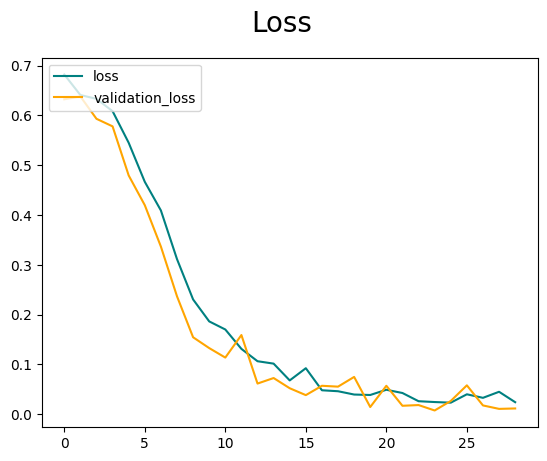

In [ ]:
#Plotting the metrics
fig=plt.figure()
plt.plot(hist.history["loss"],color="teal",label="loss")
plt.plot(hist.history["val_loss"],color="orange",label="validation_loss")
plt.suptitle("Loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

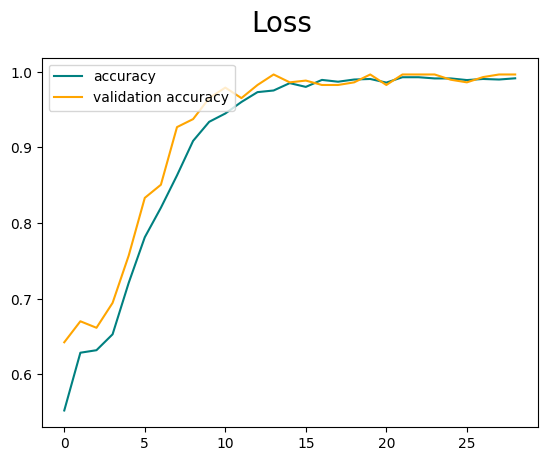

In [ ]:
#Plotting the metrics
fig=plt.figure()
plt.plot(hist.history["accuracy"],color="teal",label="accuracy")
plt.plot(hist.history["val_accuracy"],color="orange",label="validation accuracy")
plt.suptitle("Loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evaluating model
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre=Precision()
re=Recall()
ba=BinaryAccuracy()
for batch in test.as_numpy_iterator():
  x,y=batch
  ypred=model.predict(x)
  pre.update_state(y,ypred)
  re.update_state(y,ypred)
  ba.update_state(y,ypred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


In [ ]:
print(f"Precision {pre.result().numpy()}")
print(f"Recall {re.result().numpy()}")
print(f"Binary Accuracy {ba.result().numpy()}")
from sklearn.metrics import classification_report
for batch in test.as_numpy_iterator:
  x,y
  classification_report()

Precision 0.9900000095367432
Recall 0.9939393997192383
Binary Accuracy 0.9937499761581421


Absolutely! Let's walk through each line of your test image code in **super simple terms**, so you understand exactly what’s happening — and can reuse this confidently in future projects!

---

### 🧠 Your Code:

```python
import cv2
i = cv2.imread("/content/sad image for testing.jpg")
resize = tf.image.resize(i, (256, 256))
ywhat = model.predict(np.expand_dims(resize / 255, 0))
```

---

### ✅ Simple Explanation:

---

#### 1. `import cv2`

> ✔️ Loads the OpenCV library — used to read and handle images.

---

#### 2. `i = cv2.imread("/content/sad image for testing.jpg")`

> ✔️ Reads the image file into a variable `i` as a NumPy array.
> So now, `i` is your **image in numbers** (pixels).

---

#### 3. `resize = tf.image.resize(i, (256, 256))`

> ✔️ Changes the image size to **256x256 pixels** —
> this is important because your model was trained on images of this size.

---

#### 4. `resize / 255`

> ✔️ Divides each pixel by 255 to **scale values between 0 and 1**
> This matches how your model was trained (normalized input).

---

#### 5. `np.expand_dims(..., 0)`

> ✔️ Adds an **extra dimension** to represent a batch of size 1.
> Your model expects a **batch** of images — even if it's just one.

From shape `(256, 256, 3)` → becomes `(1, 256, 256, 3)`

---

#### 6. `model.predict(...)`

> ✔️ Passes the image into your **trained model** to get a prediction.
> The output will be something like `[[0.91]]` (a probability).

---

### 💡 Final Meaning:

> “Take a new image, resize it to the right size, scale it like training data, shape it like a batch, and ask the model what it thinks.”




In [ ]:
#Testing with a random image
import cv2
i=cv2.imread("/content/sad image for testing.jpg")
resize=tf.image.resize(i,(256,256))
ywhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
if ywhat<0.5:
  print("This image is happy image")
else:
  print("This image is a sad image")

This image is a sad image


#Saving the model

In [ ]:
from tensorflow.keras.models import load_model
import os
model.save(os.path.join("model","happysadmodel.h5"))

In [ ]:
new_model=load_model(os.path.join("models","/content/model/happysadmodel.h5"))

In [ ]:
new_model.predict(np.expand_dims(resize/256,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[0.9950769]], dtype=float32)

In [ ]:
new_model.predict()